Linear Regression - Analysis
============
***

We're going to pick up where we left off at the end of the exploration and define a linear model with two independent variables determining the dependent variable, Interest Rate.

Our investigation is now defined as:

_Investigate FICO Score and Loan Amount as predictors of Interest Rate for the Lending Club sample of 2,500 loans._

We use Multivariate Linear Regression to model Interest Rate variance with FICO Score and Loan Amount using:

$$InterestRate = a_0 + a_1 * FICOScore + a_2 * LoanAmount$$

We're going to use modeling software to generate the model coefficients $a_0$, $a_1$ and $a_2$ and then some error estimates that we'll only touch upon lightly at this point. 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1119910d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113e090d0>]], dtype=object)

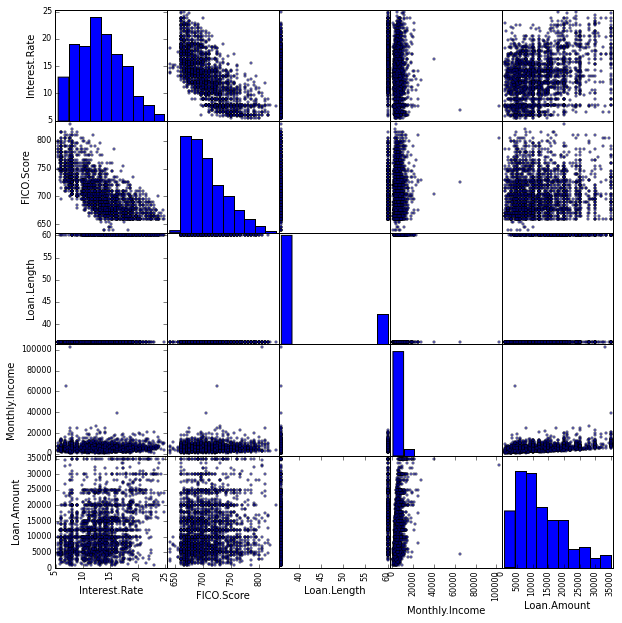

In [38]:
pd.scatter_matrix(df, figsize=(10, 10))

In [41]:
df.corr()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
Interest.Rate,1.000000,-0.709111,0.423694,0.012277,0.332352
FICO.Score,-0.709111,1.000000,0.012239,0.122009,0.082466
Loan.Length,0.423694,0.012239,1.000000,0.073959,0.412514
Monthly.Income,0.012277,0.122009,0.073959,1.000000,0.389570
Loan.Amount,0.332352,0.082466,0.412514,0.389570,1.000000


In [42]:
%pylab inline
import pylab as pl
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
import statsmodels.api as sm

# import the cleaned up dataset
df = pd.read_csv('./datasets/loanf.csv')

intrate = df['Interest.Rate']
loanamt = df['Loan.Amount']
fico = df['FICO.Score']

# reshape the data from a pandas Series to columns 
# the dependent variable
y = np.matrix(intrate).transpose()

# the independent variables shaped as columns
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()

# put the two columns together to create an input matrix 
# if we had n independent variables we would have n columns here
x = np.column_stack([x1,x2])

# create a linear model and fit it to the data
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

print 'Coefficients: ', f.params[0:2]
print 'Intercept: ', f.params[2]
print 'P-Values: ', f.pvalues
print 'R-Squared: ', f.rsquared


Populating the interactive namespace from numpy and matplotlib
Coefficients:  [ 72.88279832  -0.08844242]
Intercept:  0.000210747768548
P-Values:  [  0.00000000e+000   0.00000000e+000   5.96972978e-203]
R-Squared:  0.656632624649


`%matplotlib` prevents importing * from pylab and numpy


So we have a lot of numbers here and we're going to understand some of them.

Coefficients: contains $a_1$ and $a_2$ respectively.  
Intercept:  is the $a_0$.

How good are these numbers, how reliable?  We need to have some idea. After all we are estimating.  We're going to learn a very simple pragmatic way to use a couple of these.  

Let's look at the second two numbers.  
We are going to talk loosely here so as to give some flavor of why these are important.
But this is by no means a formal explanation.

P-Values are probabilities.  Informally, each number represents a probability that the respective coefficient we have is a really bad one.  To be fairly confident we want this probability to be close to zero. The convention is it needs to be 0.05 or less.
For now suffice it to say that if we have this true for each of our coefficients then we have good confidence in the model. If one or other of the coefficients is equal to or greater than 0.05 then we have less confidence in that particular dimension being useful in modeling and predicting.

$R$-$squared$ or $R^2$  is a measure of how much of the variance in the data is captured by the model.  What does this mean? For now let's understand this as a measure of how well the model captures the **spread** of the observed values not just the average trend. 

R is a coefficient of correlation between the independent variables and the dependent variable - i.e. how much the Y depends on the separate X's. R lies between -1 and 1, so $R^2$ lies between 0 and 1. 

A high $R^2$ would be close to 1.0 a low one close to 0.  The value we have, 0.65, is a reasonably good one.  It suggests an R with absolute value in the neighborhood of 0.8.
The details of these error estimates deserve a separate discussion which we defer until another time.

In summary we have a linear multivariate regression model for Interest Rate based on FICO score and Loan Amount which is well described by the parameters above.


In [20]:
# Predicted
f.fittedvalues

array([ 11.02505427,  10.18865997,  11.91922128, ...,  17.45771359,
        16.38329132,  14.13683464])

In [46]:
def interestRateCalc(fs, la): 
    return (0.00021 + (fs * -0.0884) + (la * 72.88))